# Clasificaciones usando muestra de tamaño 5000

In [1]:
import pickle

import numpy as np

import pandas as pd

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from libs.container import Container
from libs.display import d
from libs.experiment import KFoldExperiment, WithAnotherExperiment, roc

In [2]:
import joblib
cpu = joblib.cpu_count()

In [3]:
sample = pd.read_pickle("data/ogle3_only/scaled/s5k.pkl.bz2")
sample["tile"] = sample["id"].apply(lambda i: "b" + str(i)[1:4])
sample["cls"] = sample.vs_type.apply(lambda x: 0 if x == "" else 1)

In [4]:
no_features = ["id", "vs_catalog", "vs_type", "ra_k", "dec_k", "tile", "cls"] 
X_columns = [c for c in sample.columns if c not in no_features]

grouped = sample.groupby("tile")
data = Container({k: grouped.get_group(k).copy() for k in grouped.groups.keys()})

del grouped, sample

## Features

In [5]:
cls = {0:0, 1:1}

In [6]:
d(X_columns)

1. cnt
2. Amplitude
3. Autocor_length
4. Beyond1Std
5. CAR_mean
6. CAR_sigma
7. CAR_tau
8. Con
9. Eta_e
10. FluxPercentileRatioMid20
11. FluxPercentileRatioMid35
12. FluxPercentileRatioMid50
13. FluxPercentileRatioMid65
14. FluxPercentileRatioMid80
15. Freq1_harmonics_amplitude_0
16. Freq1_harmonics_amplitude_1
17. Freq1_harmonics_amplitude_2
18. Freq1_harmonics_amplitude_3
19. Freq1_harmonics_rel_phase_0
20. Freq1_harmonics_rel_phase_1
21. Freq1_harmonics_rel_phase_2
22. Freq1_harmonics_rel_phase_3
23. LinearTrend
24. MaxSlope
25. Mean
26. Meanvariance
27. MedianAbsDev
28. MedianBRP
29. PairSlopeTrend
30. PercentAmplitude
31. PercentDifferenceFluxPercentile
32. PeriodLS
33. Period_fit
34. Psi_CS
35. Psi_eta
36. Q31
37. Rcs
38. Skew
39. SmallKurtosis
40. Std
41. c89_jk_color
42. c89_hk_color
43. c89_jh_color
44. n09_jk_color
45. n09_hk_color
46. n09_jh_color
47. c89_m2
48. c89_m4
49. c89_c3
50. n09_m2
51. n09_m4
52. n09_c3
53. AmplitudeH
54. AmplitudeJ
55. ppmb
56. AmplitudeJH
57. AmplitudeJK

## b278 - K-Folds

In [7]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_linear = svc_linear("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      4983
        1.0       0.91      0.55      0.68       423

avg / total       0.96      0.96      0.96      5406

--------------------------------------------------------------------------------
CPU times: user 1min 16s, sys: 3 ms, total: 1min 16s
Wall time: 1min 16s


In [8]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_poly = svc_poly("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97      4983
        1.0       0.85      0.43      0.57       423

avg / total       0.95      0.95      0.94      5406

--------------------------------------------------------------------------------
CPU times: user 45.5 s, sys: 0 ns, total: 45.5 s
Wall time: 45.5 s


In [9]:
%%time
svc_rbf = KFoldExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls,
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_rbf = svc_rbf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      4983
        1.0       0.91      0.53      0.67       423

avg / total       0.96      0.96      0.95      5406

--------------------------------------------------------------------------------
CPU times: user 49 s, sys: 4 ms, total: 49 s
Wall time: 49 s


In [10]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
rf = rf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      4983
        1.0       0.93      0.79      0.85       423

avg / total       0.98      0.98      0.98      5406

--------------------------------------------------------------------------------
CPU times: user 4min 48s, sys: 10 s, total: 4min 58s
Wall time: 43.1 s


In [11]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
knn = knn("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97      4983
        1.0       0.85      0.46      0.59       423

avg / total       0.95      0.95      0.94      5406

--------------------------------------------------------------------------------
CPU times: user 14.1 s, sys: 0 ns, total: 14.1 s
Wall time: 14.1 s


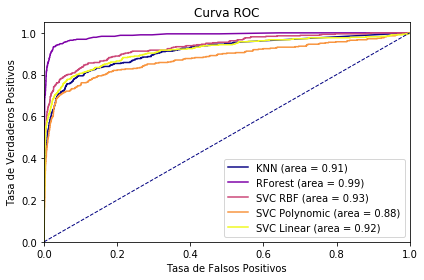

In [12]:
roc({"KNN": knn, "RForest": rf, 
     "SVC RBF": svc_rbf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})

## b278 vs. Los demas

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4991
          1       0.84      0.69      0.76       221

avg / total       0.98      0.98      0.98      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.89      0.62      0.73       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.89      0.59      0.71       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

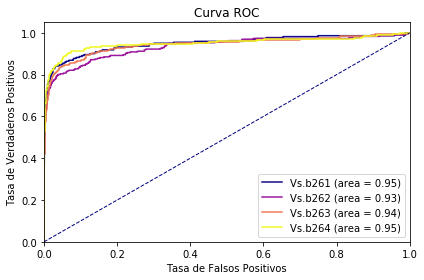

CPU times: user 43.5 s, sys: 19 ms, total: 43.5 s
Wall time: 43.5 s


In [13]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4991
          1       0.77      0.60      0.67       221

avg / total       0.97      0.98      0.97      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      4992
          1       0.85      0.58      0.69       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.83      0.51      0.63       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

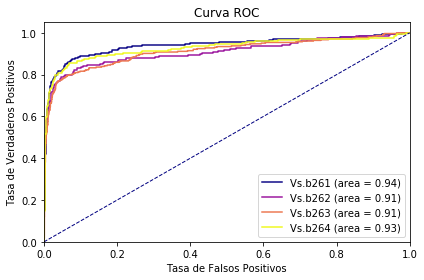

CPU times: user 26.3 s, sys: 14 ms, total: 26.3 s
Wall time: 26.3 s


In [14]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4991
          1       0.88      0.68      0.77       221

avg / total       0.98      0.98      0.98      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.92      0.62      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4997
          1       0.89      0.57      0.70       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

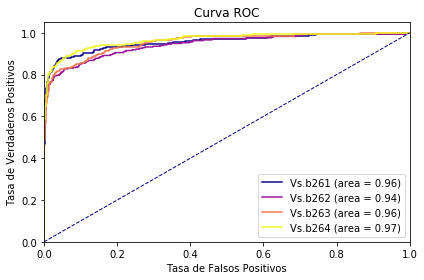

CPU times: user 29.6 s, sys: 6 ms, total: 29.6 s
Wall time: 29.6 s


In [15]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      4991
          1       0.93      0.84      0.89       221

avg / total       0.99      0.99      0.99      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4992
          1       0.97      0.78      0.87       296

avg / total       0.99      0.99      0.99      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4997
          1       0.97      0.77      0.86       305

avg / total       0.99      0.99      0.98      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

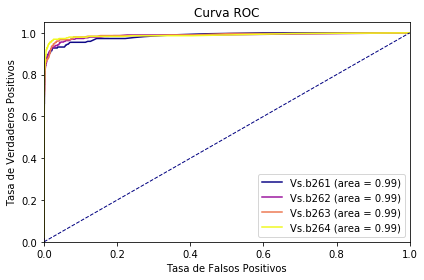

CPU times: user 2min 9s, sys: 4.54 s, total: 2min 14s
Wall time: 18.3 s


In [16]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4991
          1       0.81      0.60      0.69       221

avg / total       0.98      0.98      0.98      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.85      0.60      0.71       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.81      0.50      0.62       305

avg / total       0.96      0.96      0.96      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

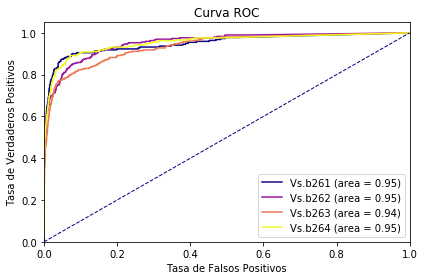

CPU times: user 1min, sys: 6 ms, total: 1min
Wall time: 1min


In [17]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b278"))

## b261 vs. Los demas

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.91      0.62      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.91      0.63      0.75       305

avg / total       0.97      0.98      0.97      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4998
          1       0.94      0.65      0.77       294

avg / total       0.98      0.98      0.98      5292

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

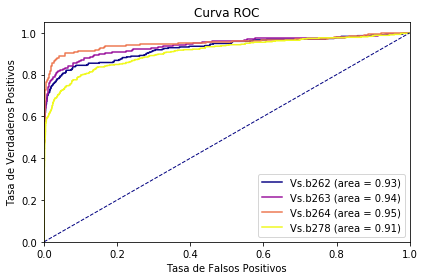

CPU times: user 16.7 s, sys: 0 ns, total: 16.7 s
Wall time: 16.7 s


In [18]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4992
          1       0.90      0.52      0.66       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.84      0.48      0.61       305

avg / total       0.96      0.96      0.96      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4998
          1       0.90      0.50      0.64       294

avg / total       0.97      0.97      0.96      5292

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

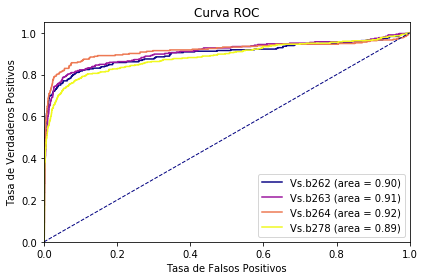

CPU times: user 13.3 s, sys: 4 ms, total: 13.3 s
Wall time: 13.3 s


In [19]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.96      0.58      0.73       296

avg / total       0.98      0.98      0.97      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4997
          1       0.93      0.56      0.70       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4998
          1       0.95      0.61      0.75       294

avg / total       0.98      0.98      0.97      5292

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

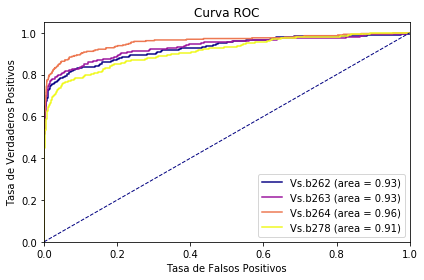

CPU times: user 17 s, sys: 6 ms, total: 17 s
Wall time: 17 s


In [20]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.98      0.73      0.84       296

avg / total       0.98      0.98      0.98      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.99      0.73      0.84       305

avg / total       0.98      0.98      0.98      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4998
          1       0.99      0.76      0.86       294

avg / total       0.99      0.99      0.99      5292

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

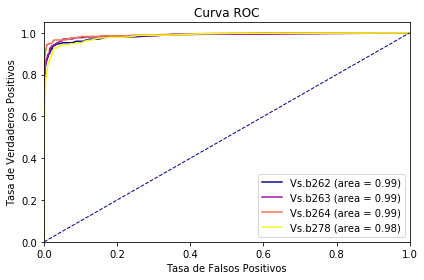

CPU times: user 1min 56s, sys: 4.32 s, total: 2min 1s
Wall time: 18.4 s


In [21]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4992
          1       0.90      0.49      0.64       296

avg / total       0.97      0.97      0.96      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.86      0.45      0.59       305

avg / total       0.96      0.96      0.96      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4998
          1       0.91      0.52      0.66       294

avg / total       0.97      0.97      0.97      5292

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

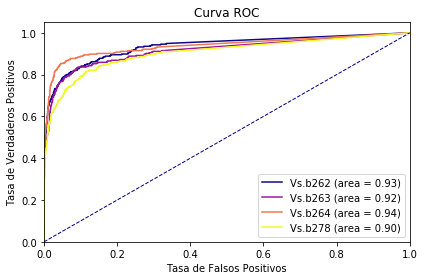

CPU times: user 1min 1s, sys: 3 ms, total: 1min 1s
Wall time: 1min 1s


In [22]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b261"))

## b278 + b261 vs. Los demas

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.90      0.63      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.91      0.60      0.72       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4998
          1       0.95      0.65      0.77       294

avg / total       0.98      0.98      0.98      5292

--------------------------------------------------------------------------------


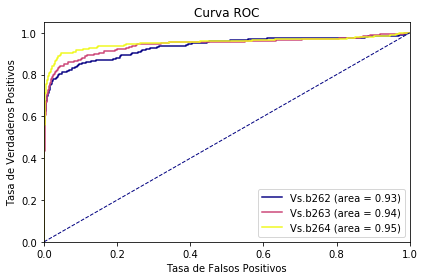

CPU times: user 1min 33s, sys: 315 ms, total: 1min 34s
Wall time: 1min 34s


In [23]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.91      0.58      0.71       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.88      0.53      0.66       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4998
          1       0.90      0.56      0.69       294

avg / total       0.97      0.97      0.97      5292

--------------------------------------------------------------------------------


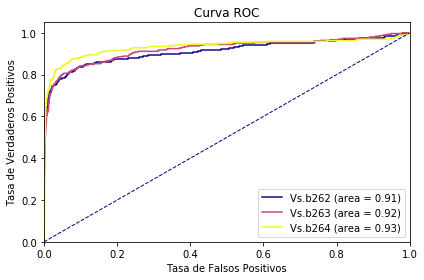

CPU times: user 1min, sys: 260 ms, total: 1min 1s
Wall time: 1min 1s


In [24]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.94      0.62      0.75       296

avg / total       0.98      0.98      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.92      0.58      0.71       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4998
          1       0.95      0.63      0.76       294

avg / total       0.98      0.98      0.98      5292

--------------------------------------------------------------------------------


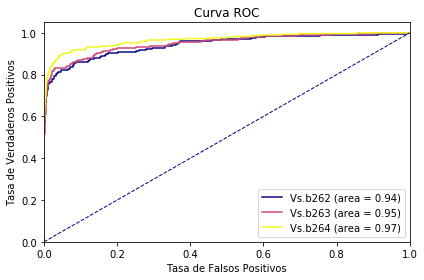

CPU times: user 1min 4s, sys: 181 ms, total: 1min 4s
Wall time: 1min 4s


In [25]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4992
          1       0.97      0.79      0.87       296

avg / total       0.99      0.99      0.99      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4997
          1       0.98      0.79      0.87       305

avg / total       0.99      0.99      0.99      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4998
          1       0.97      0.84      0.90       294

avg / total       0.99      0.99      0.99      5292

--------------------------------------------------------------------------------


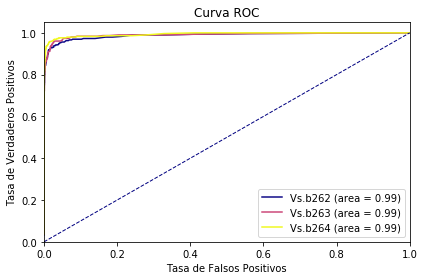

CPU times: user 3min 14s, sys: 2.97 s, total: 3min 17s
Wall time: 15.1 s


In [26]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.86      0.60      0.71       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.82      0.52      0.64       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4998
          1       0.88      0.57      0.69       294

avg / total       0.97      0.97      0.97      5292

--------------------------------------------------------------------------------


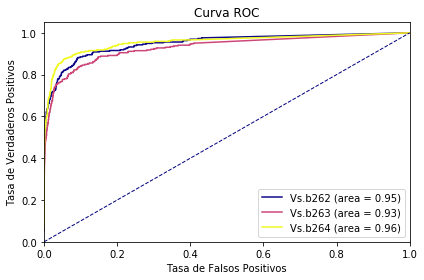

CPU times: user 1min 39s, sys: 5 ms, total: 1min 39s
Wall time: 1min 39s


In [27]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261"]))

## b278 + b261 + b264 vs. Los demas

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.88      0.64      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.91      0.62      0.74       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------


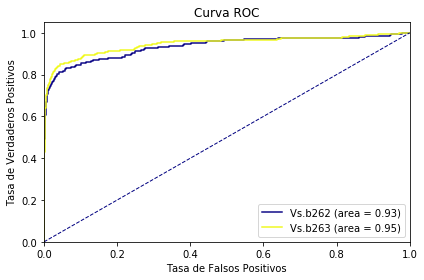

CPU times: user 2min 48s, sys: 787 ms, total: 2min 49s
Wall time: 2min 49s


In [28]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.88      0.59      0.71       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.88      0.55      0.68       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------


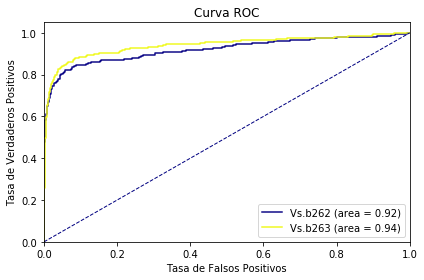

CPU times: user 1min 59s, sys: 728 ms, total: 2min
Wall time: 2min


In [29]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.94      0.64      0.76       296

avg / total       0.98      0.98      0.98      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.95      0.62      0.75       305

avg / total       0.98      0.98      0.97      5302

--------------------------------------------------------------------------------


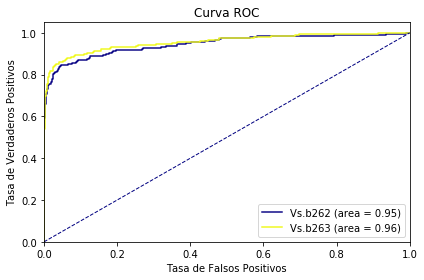

CPU times: user 1min 56s, sys: 615 ms, total: 1min 57s
Wall time: 1min 57s


In [30]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4992
          1       0.97      0.81      0.88       296

avg / total       0.99      0.99      0.99      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4997
          1       0.97      0.80      0.88       305

avg / total       0.99      0.99      0.99      5302

--------------------------------------------------------------------------------


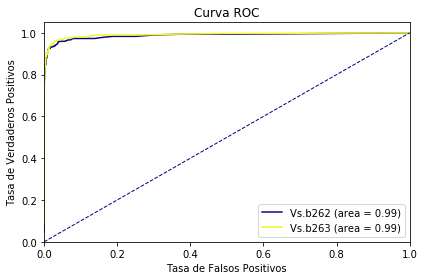

CPU times: user 3min 15s, sys: 1.92 s, total: 3min 17s
Wall time: 11.3 s


In [31]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.86      0.62      0.72       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.82      0.55      0.66       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------


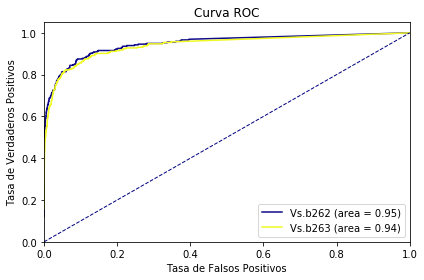

CPU times: user 2min 36s, sys: 4 ms, total: 2min 36s
Wall time: 2min 36s


In [32]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261", "b264"]))